In [1]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import scipy.optimize as sco
import scipy.stats as sct

In [2]:
names1 = ['apo', 'bound', 'allo-apo', 'allo-bound', 'allo-both']

In [3]:
bins = np.arange(3,5,0.01)
xb = bins[1:] - (bins[1]-bins[0])/2
zeros = np.zeros(xb.shape)

In [4]:
wt = [np.loadtxt(f'../7_ith_kink/3_ith_and_e_h_movements/2_h_318b/dist_318b_h_p450_4jx1_{n}.xvg',
                comments=['@','#'])[:,1] 
     for n in names1]

In [5]:
hwt = [np.histogram(d, bins=bins, density=True)[0] for d in wt]

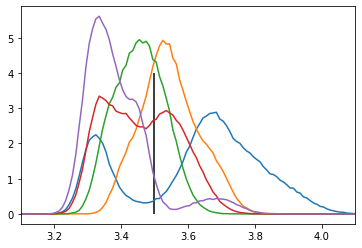

In [6]:
for h in hwt: plt.plot(xb, h)
plt.xlim(3.1,4.1)
plt.vlines(3.5, 0, 4, color='black')

In [7]:
[np.where(d<3.5)[0].shape[0]/d.shape[0] for d in wt]

[0.26855759714052746,
 0.31204455361767375,
 0.7105617248077235,
 0.6117724520171499,
 0.9065110183630612]

In [6]:
def normal(x, m, s):
    return 1/(np.sqrt(2*np.pi)*s) * np.exp(-0.5 * np.square((x-m)/s))
def binormal(x, m1, s1, m2, s2, p):
    return p*normal(x,m1,s1) + (1-p)*normal(x,m2,s2)

In [9]:
params = sco.curve_fit(binormal, xb, hwt[0],
             bounds=(
                 [3.0, 0, 3.5, 0, 0],
                 [3.5, 2, 4.0, 2, 1]
             )
             )[0]

array([3.3266612 , 0.04344355, 3.69841253, 0.11509228, 0.24427761])

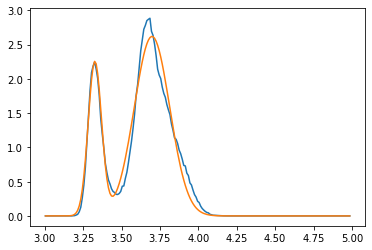

In [10]:
plt.plot(xb, hwt[0])
plt.plot(xb, binormal(xb, *params) )
params

In [7]:
names2 = ['g2489a', 'g249v', 'g249w', 'og249w']

In [8]:
closed = [np.loadtxt(f'../7_ith_kink/3_ith_and_e_h_movements/2_h_318b/dist_318b_h_p450_{n}_apo.xvg',
                    comments=['@','#'])[:,1]
         for n in names2]

In [9]:
hclosed = [np.histogram(d, bins=bins, density=True)[0] for d in closed]

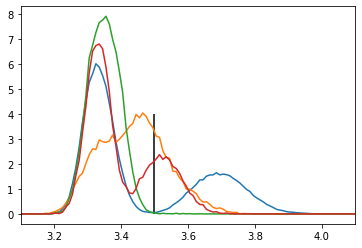

In [25]:
for h in hclosed: plt.plot(xb, h)
plt.xlim(3.1,4.1)
plt.vlines(3.5, 0, 4, color='black')

In [16]:
[np.where(d<3.5)[0].shape[0]/d.shape[0] for d in closed]

[0.6675299101030251,
 0.7375519204143377,
 0.9985128967745244,
 0.7761140454335675]

In [10]:
opened = [np.loadtxt(f'../7_ith_kink/3_ith_and_e_h_movements/2_h_318b/dist_318b_h_p450_l166a_{n}.xvg',
                    comments=['@','#'])[:,1]
         for n in names1[:2]]

In [11]:
hopened = [np.histogram(d, bins=bins, density=True)[0] for d in opened]

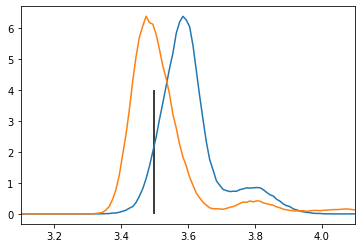

In [19]:
for h in hopened: plt.plot(xb,h)
plt.xlim(3.1,4.1)
plt.vlines(3.5, 0, 4, color='black')

In [20]:
[np.where(d<3.5)[0].shape[0]/d.shape[0] for d in opened]

[0.07224578335495715, 0.5072794498489751]

In [12]:
decoupled = [np.loadtxt(f'../7_ith_kink/3_ith_and_e_h_movements/2_h_318b/dist_318b_h_p450_f163a_{n}.xvg',
                    comments=['@','#'])[:,1]
            for n in names1]

In [13]:
hdecoupled = [np.histogram(d, bins=bins, density=True)[0] for d in decoupled]

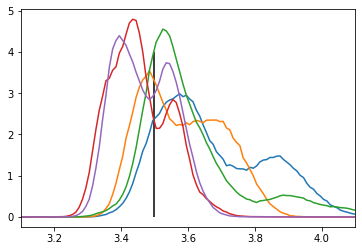

In [23]:
for h in hdecoupled: plt.plot(xb,h)
plt.xlim(3.1,4.1)
plt.vlines(3.5, 0, 4, color='black')

In [24]:
[np.where(d<3.5)[0].shape[0]/d.shape[0] for d in decoupled]

[0.13124035261357633,
 0.3107317398372316,
 0.2218399409731325,
 0.6974212103151587,
 0.6095448696420014]

In [21]:
decoupled2 = [np.loadtxt(f'../7_ith_kink/3_ith_and_e_h_movements/2_h_318b/dist_318b_h_p450_multi_{n}.xvg',
                    comments=['@','#'])[:,1]
            for n in names1]

In [22]:
hdecoupled2 = [np.histogram(d, bins=bins, density=True)[0] for d in decoupled2]

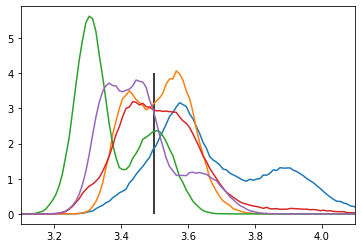

In [18]:
for h in hdecoupled2: plt.plot(xb,h)
plt.xlim(3.1,4.1)
plt.vlines(3.5, 0, 4, color='black')

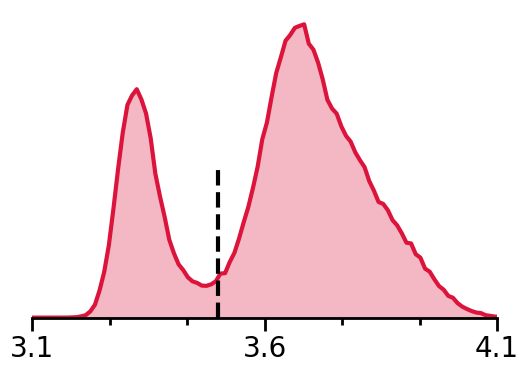

In [20]:
curve = hwt[0]
oname='h_wt_sf'
fig,ax=plt.subplots(1, figsize=(6,4))
ax.fill_between(xb, zeros, curve, color='crimson', alpha=0.3)
ax.plot(xb, curve, color='crimson', lw=3)
ax.set_xlim(3.1,4.1)
ax.set_xticks([3.1, 3.6, 4.1])
ax.set_ylim(0,)
ax.vlines(3.5, 0, ax.get_ylim()[1]/2, linestyle='--', lw=3, color='black')
ax.spines[['top','left','right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(labelleft=False, left=False, labelsize=20, length=9, width=2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

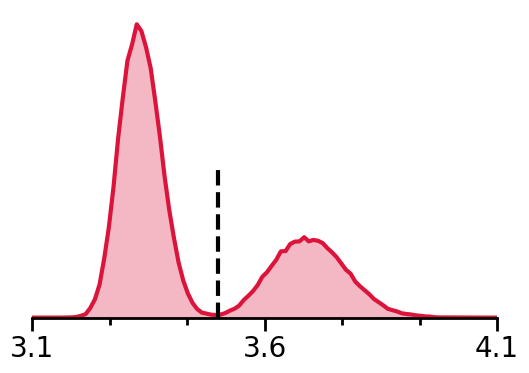

In [26]:
curve = hclosed[0]
oname='h_g2489a_sf'
fig,ax=plt.subplots(1, figsize=(6,4))
#
ax.fill_between(xb, zeros, curve, color='crimson', alpha=0.3)
ax.plot(xb, curve, color='crimson', lw=3)
#
# curve = hclosed[2]
# ax.fill_between(xb, zeros, curve, color='dodgerblue', alpha=0.3)
# ax.plot(xb, curve, color='dodgerblue', lw=3)
#
ax.set_xlim(3.1,4.1)
ax.set_xticks([3.1, 3.6, 4.1])
ax.set_ylim(0,)
ax.vlines(3.5, 0, ax.get_ylim()[1]/2, linestyle='--', lw=3, color='black')
ax.spines[['top','left','right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(labelleft=False, left=False, labelsize=20, length=9, width=2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

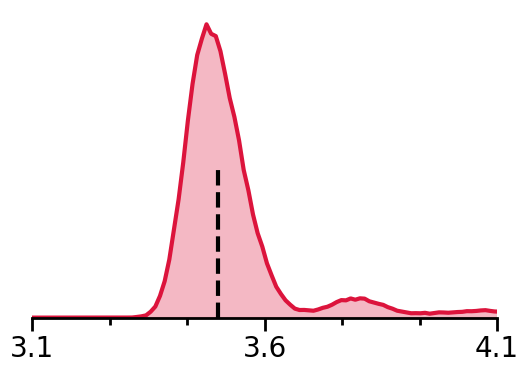

In [29]:
curve = hopened[1]
oname='h_l166a_cata'
fig,ax=plt.subplots(1, figsize=(6,4))
ax.fill_between(xb, zeros, curve, color='crimson', alpha=0.3)
ax.plot(xb, curve, color='crimson', lw=3)
ax.set_xlim(3.1,4.1)
ax.set_xticks([3.1, 3.6, 4.1])
ax.set_ylim(0,)
ax.vlines(3.5, 0, ax.get_ylim()[1]/2, linestyle='--', lw=3, color='black')
ax.spines[['top','left','right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(labelleft=False, left=False, labelsize=20, length=9, width=2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

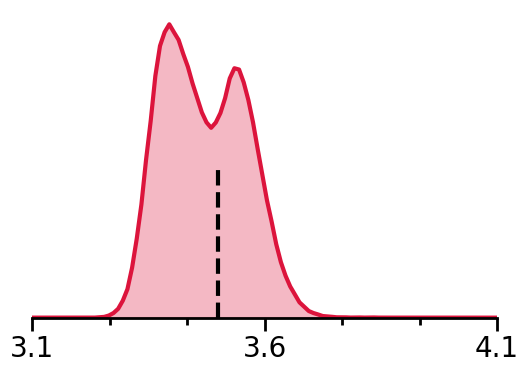

In [34]:
curve = hdecoupled[4]
oname='h_f163a_3s'
fig,ax=plt.subplots(1, figsize=(6,4))
ax.fill_between(xb, zeros, curve, color='crimson', alpha=0.3)
ax.plot(xb, curve, color='crimson', lw=3)
ax.set_xlim(3.1,4.1)
ax.set_xticks([3.1, 3.6, 4.1])
ax.set_ylim(0,)
ax.vlines(3.5, 0, ax.get_ylim()[1]/2, linestyle='--', lw=3, color='black')
ax.spines[['top','left','right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(labelleft=False, left=False, labelsize=20, length=9, width=2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()

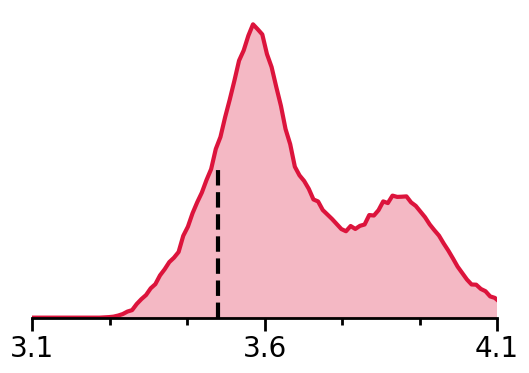

In [39]:
curve = hdecoupled2[0]
oname='h_multi_sf'
fig,ax=plt.subplots(1, figsize=(6,4))
ax.fill_between(xb, zeros, curve, color='crimson', alpha=0.3)
ax.plot(xb, curve, color='crimson', lw=3)
ax.set_xlim(3.1,4.1)
ax.set_xticks([3.1, 3.6, 4.1])
ax.set_ylim(0,)
ax.vlines(3.5, 0, ax.get_ylim()[1]/2, linestyle='--', lw=3, color='black')
ax.spines[['top','left','right']].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(labelleft=False, left=False, labelsize=20, length=9, width=2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=5, width=2)
#
plt.savefig(f'saved_plots/{oname}.pdf', transparent=True)
plt.show()